In [1]:
import matplotlib
import matplotlib.pyplot as plt
import urllib.request
import numpy as np
import math
import peakutils
import math
import time,os,sys
import datetime
import matplotlib.dates as mdates
from os import listdir
from os.path import isfile, join
import numpy.ma as ma
import sunpy
import sunpy.map
from sunpy.timeseries import TimeSeries
from sunpy.time import TimeRange, parse_time
from sunpy.net import hek, Fido, attrs as a
import astropy.units as u
from astropy.coordinates import SkyCoord
import pickle
import warnings
from scipy import stats
import copy
import imageio

import pandas as pd
import seaborn as sns
import matplotlib.animation as animation
%matplotlib notebook

In [48]:
Ne = np.load('../Ne_v6.npy')
Ne[Ne<=0]=np.nan
times = np.load('../times_v6.npy')

Ne_log10 = np.array([np.log10(ne) for ne in Ne])

Ne_min = np.nanmin(Ne_log10)
Ne_max = np.nanmax(Ne_log10)
levels = np.linspace(Ne_min,Ne_max,70)
print(Ne_min,Ne_max)
print(levels)

tiempos = np.array([datetime.datetime.strftime(t,'%Y-%m-%d %H:%M:%S') for t in times])

15.908852022741966 22.85271323006321
[15.90885202 16.00948769 16.11012336 16.21075903 16.3113947  16.41203037
 16.51266604 16.61330171 16.71393738 16.81457305 16.91520872 17.01584439
 17.11648006 17.21711573 17.3177514  17.41838707 17.51902274 17.61965841
 17.72029408 17.82092975 17.92156542 18.02220109 18.12283676 18.22347243
 18.32410809 18.42474376 18.52537943 18.6260151  18.72665077 18.82728644
 18.92792211 19.02855778 19.12919345 19.22982912 19.33046479 19.43110046
 19.53173613 19.6323718  19.73300747 19.83364314 19.93427881 20.03491448
 20.13555015 20.23618582 20.33682149 20.43745716 20.53809283 20.6387285
 20.73936417 20.83999984 20.94063551 21.04127118 21.14190685 21.24254252
 21.34317818 21.44381385 21.54444952 21.64508519 21.74572086 21.84635653
 21.9469922  22.04762787 22.14826354 22.24889921 22.34953488 22.45017055
 22.55080622 22.65144189 22.75207756 22.85271323]


/Users/juancg/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less_equal
  


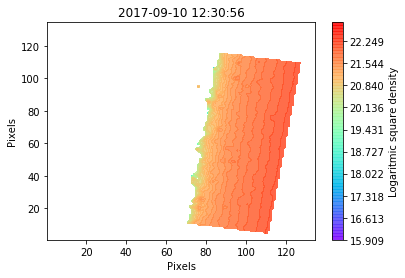

In [31]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=4, metadata=dict(artist='Me'), bitrate=9000)

fig,ax = plt.subplots()

def animate(i):
    ax.clear()
    im = ax.contourf(Ne_log10[i,:,:],levels, alpha=0.85, cmap=plt.cm.rainbow, origin='lower')
    ax.set_title('%s'%(tiempos[i]))
    ax.set_xlabel(r'Pixels')
    ax.set_ylabel(r'Pixels')

cbar = plt.colorbar(ax.contourf(Ne_log10[0,:,:],levels, alpha=0.85, cmap=plt.cm.rainbow, origin='lower'))
cbar.ax.set_ylabel(r'Logaritmic square density')
# plt.tight_layout()
interval = 1#in seconds     
ani = animation.FuncAnimation(fig,animate,len(Ne_log10),interval=interval*1e+3,blit=False)
ani.save('densities.mp4', writer = writer,dpi=300)


plt.show()

(<matplotlib.image.AxesImage at 0x1c272dea58>,
 <matplotlib.colorbar.Colorbar at 0x1c2971b080>)

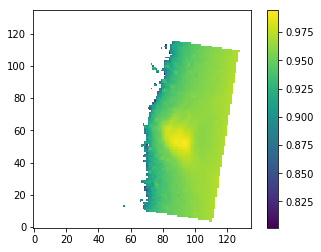

In [32]:
plt.imshow(Ne_log10[40]/np.nanmax(Ne_log10),origin='lower'),plt.colorbar()

In [116]:
levels2 = np.linspace(Ne_max*0.97,Ne_max*0.999999,6)

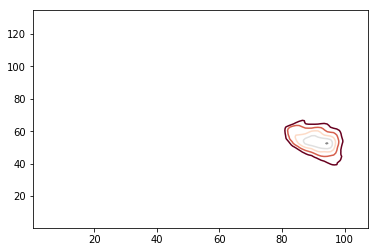

In [117]:
# plt.imshow(Ne_log10[40]/np.nanmax(Ne_log10),origin='lower'),plt.colorbar()
plt.contour(Ne_log10[40][:,:-27],levels=levels2,origin='lower',cmap='RdGy')

In [50]:
Ne_max*0.9

20.56744190705689

In [90]:
from skimage import measure

In [91]:
img = copy.copy(Ne_log10[40])


In [92]:
cnt = measure.find_contours(img,Ne_max*0.97)

r = 1.0: a =2.717832674400994
r = 2.0: a =11.764975817834626
r = 3.0: a =27.04561732118695


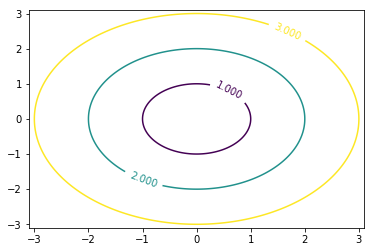

In [97]:
def area(vs):
    a = 0
    x0,y0 = vs[0]
    for [x1,y1] in vs[1:]:
        dx = x1-x0
        dy = y1-y0
        a += 0.5*(y0*dx - x0*dy)
        x0 = x1
        y0 = y1
    return a

# Generate some test data.
delta = 0.01
x = np.arange(-3.1, 3.1, delta)
y = np.arange(-3.1, 3.1, delta)
X, Y = np.meshgrid(x, y)
r = np.sqrt(X**2 + Y**2)

# Plot the data
levels = [1.0,2.0,3.0]
cs = plt.contour(X,Y,r,levels=levels)
plt.clabel(cs, inline=1, fontsize=10)

# Get one of the contours from the plot.
for i in range(len(levels)):
    contour = cs.collections[i]
    vs = contour.get_paths()[0].vertices
    # Compute area enclosed by vertices.
    a = area(vs)
    print( "r = " + str(levels[i]) + ": a =" + str(a))

plt.show()

r = 22.258542686081565: a =67.63589935795765
r = 22.324561632873667: a =308.5134985543246
r = 22.390580579665773: a =-3.9109667144944282


IndexError: list index out of range

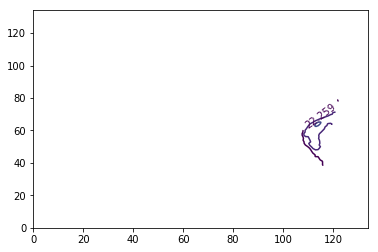

In [250]:
# Plot the data
levels = np.linspace(Ne_max*0.974,Ne_max*0.999999999,10)
cs = plt.contour(Ne_log10[36][:,:],levels=levels)
plt.clabel(cs, inline=1, fontsize=10)

# Get one of the contours from the plot.
for i in range(len(levels)):
    contour = cs.collections[i]
    vs = contour.get_paths()[0].vertices
    # Compute area enclosed by vertices.
    a = area(vs)
    print( "r = " + str(levels[i]) + ": a =" + str(a))


In [251]:
pix = [67.63589935795765,109.63748182688241,260.00343321862056,388.2705973900365,252.46759382064917,214.02150852345358,110.11298552471195,7.358832417704683,0.25293363364393784]

# pix = [11.30797764635486,171.21062909404742,190.46990424258942,222.47223820247814,235.57126480681598,199.08641167067637,64.82701819052808]

In [252]:
area_arcsec = np.array(pix) * (1/0.5016345536842105)**2

In [253]:
dsun_Mm = 150624238790.77 /1e8
dsun_arcsec = (953.105652 * 2)
arcsec_to_Mm = (dsun_arcsec/dsun_Mm)
area_Mm = area_arcsec*(1/arcsec_to_Mm)**2


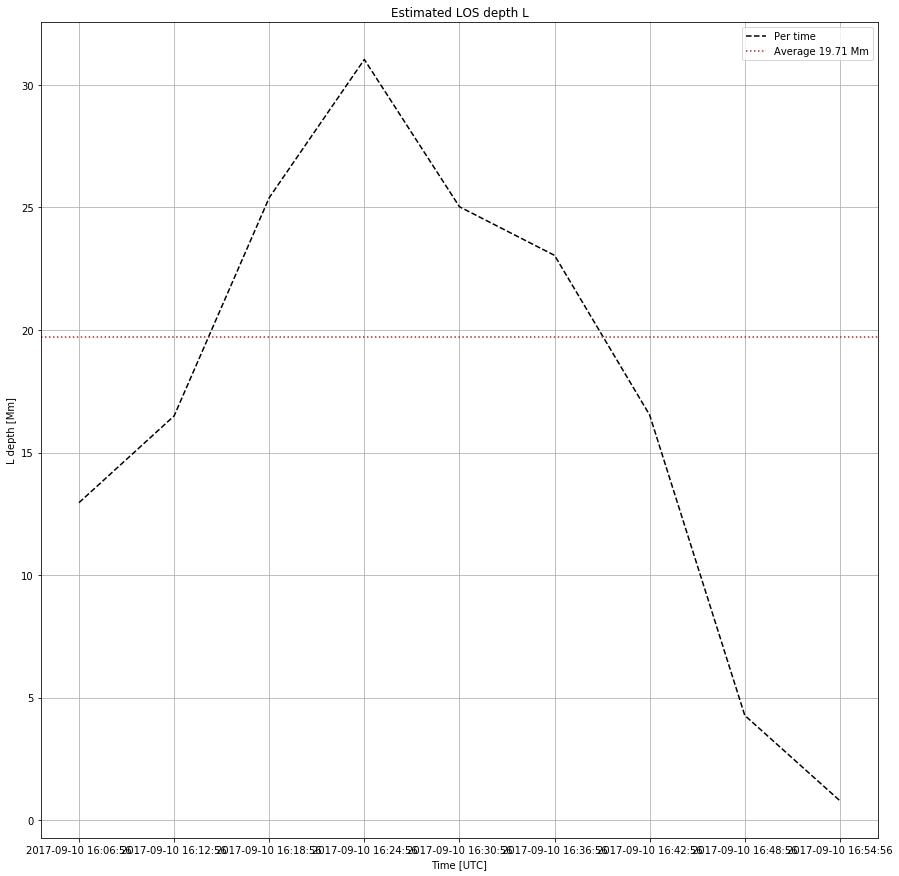

In [254]:
fig = plt.figure(figsize=(15,15))
plt.title(r'Estimated LOS depth L')
plt.plot(tiempos[36:45],np.sqrt(area_Mm),'--k',label='Per time')
plt.axhline(y=np.sqrt(np.mean(area_Mm)),linestyle=':',color='brown',label='Average %.2f Mm'%(np.sqrt(np.mean(area_Mm))))
plt.xlabel(r'Time [UTC]')
plt.ylabel(r'L depth [Mm]')
plt.legend()
plt.grid()
fig.savefig('L_depth.png',dpi=300)

In [294]:
ne = copy.copy(Ne[36:45])
ne[ne<=0]=np.nan
ne_cm3 = [ne[i]*(1/(np.sqrt(area_Mm[i])*1e8)) for i in range(len(area_Mm))]
ne_cm3 = np.array(ne_cm3)

ne_log10 = np.array([np.log10(nee) for nee in ne_cm3])

ne_min = np.nanmin(ne_log10)
ne_max = np.nanmax(ne_log10)
levels = np.linspace(ne_min,ne_max,30)
print(ne_min,ne_max)
print(levels)
tiempos_cm3 = copy.copy(tiempos[36:45])

8.221691223078443 14.472053115198333
[ 8.22169122  8.43722094  8.65275066  8.86828038  9.0838101   9.29933983
  9.51486955  9.73039927  9.94592899 10.16145871 10.37698843 10.59251815
 10.80804787 11.02357759 11.23910731 11.45463703 11.67016675 11.88569647
 12.10122619 12.31675591 12.53228563 12.74781535 12.96334507 13.17887479
 13.39440451 13.60993423 13.82546395 14.04099367 14.25652339 14.47205312]


/Users/juancg/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less_equal
  


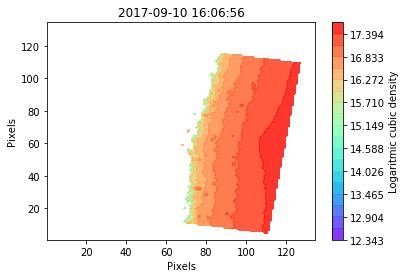

In [230]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=4, metadata=dict(artist='Me'), bitrate=9000)

fig,ax = plt.subplots()

def animate(i):
    ax.clear()
    im = ax.contourf(ne_log10[i,:,:],levels, alpha=0.85, cmap=plt.cm.rainbow, origin='lower')
    ax.set_title('%s'%(tiempos_cm3[i]))
    ax.set_xlabel(r'Pixels')
    ax.set_ylabel(r'Pixels')

cbar = plt.colorbar(ax.contourf(ne_log10[5,:,:],levels, alpha=0.85, cmap=plt.cm.rainbow, origin='lower'))
cbar.ax.set_ylabel(r'Logaritmic cubic density')
# plt.tight_layout()
interval = 20#in seconds     
ani = animation.FuncAnimation(fig,animate,len(ne_log10),interval=interval*1e+3,blit=False)
ani.save('densities_cm3.mp4', writer = writer,dpi=300)


plt.show()

In [216]:
np.nanmax(ne_log10)

13.428124766546565

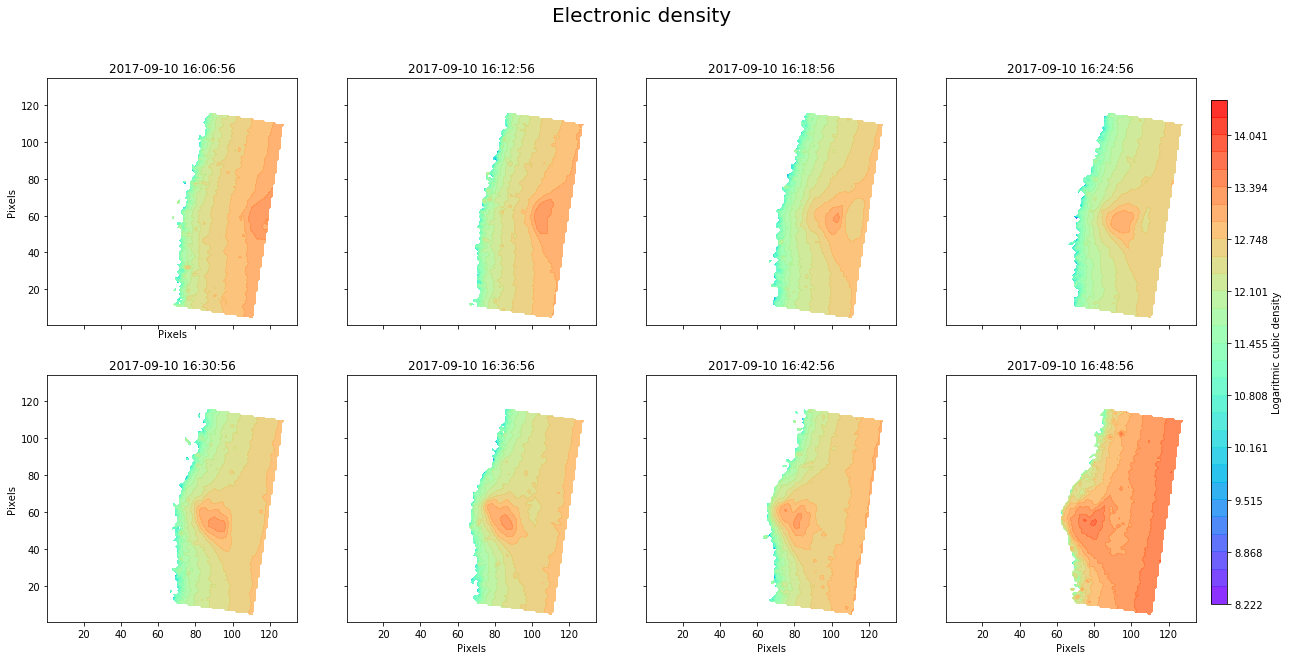

In [295]:
fig, ax = plt.subplots(ncols=4,nrows=2,sharex=True,sharey=True)
fig.suptitle(r'Electronic density',fontsize=20)

fig.set_size_inches(22,10)

ax[0,0].contourf(ne_log10[0,:,:],levels, alpha=0.85, cmap=plt.cm.rainbow, origin='lower')
ax[0,0].set_title('%s'%(tiempos_cm3[0]))
# ax[0,0].set_xlabel(r'Pixels')
ax[0,0].set_ylabel(r'Pixels')

ax[0,1].contourf(ne_log10[1,:,:],levels, alpha=0.85, cmap=plt.cm.rainbow, origin='lower')
ax[0,1].set_title('%s'%(tiempos_cm3[1]))

ax[0,2].contourf(ne_log10[2,:,:],levels, alpha=0.85, cmap=plt.cm.rainbow, origin='lower')
ax[0,2].set_title('%s'%(tiempos_cm3[2]))

ax[0,3].contourf(ne_log10[3,:,:],levels, alpha=0.85, cmap=plt.cm.rainbow, origin='lower')
ax[0,3].set_title('%s'%(tiempos_cm3[3]))


im = ax[1,0].contourf(ne_log10[4,:,:],levels, alpha=0.85, cmap=plt.cm.rainbow, origin='lower')
ax[1,0].set_title('%s'%(tiempos_cm3[4]))
ax[0,0].set_xlabel(r'Pixels')
ax[1,0].set_ylabel(r'Pixels')

ax[1,1].contourf(ne_log10[5,:,:],levels, alpha=0.85, cmap=plt.cm.rainbow, origin='lower')
ax[1,1].set_title('%s'%(tiempos_cm3[5]))
ax[1,1].set_xlabel(r'Pixels')

ax[1,2].contourf(ne_log10[6,:,:],levels, alpha=0.85, cmap=plt.cm.rainbow, origin='lower')
ax[1,2].set_title('%s'%(tiempos_cm3[6]))
ax[1,2].set_xlabel(r'Pixels')

ax[1,3].contourf(ne_log10[7,:,:],levels, alpha=0.85, cmap=plt.cm.rainbow, origin='lower')
ax[1,3].set_title('%s'%(tiempos_cm3[7]))
ax[1,3].set_xlabel(r'Pixels')

fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.86, 0.15, 0.01, 0.7])
# im.ax.set_ylabel()

cbar = fig.colorbar(im, cax=cbar_ax)
cbar.set_label(r'Logaritmic cubic density',labelpad=3)

fig.savefig('densities_cm3.png',dpi=300)

In [296]:
[np.nanmax(item) for item in ne_log10]

[13.286409316370044,
 13.382857483585292,
 13.228344485760624,
 13.172544834049216,
 13.324151791726297,
 13.26917269262381,
 13.251683863404622,
 13.646501830691022,
 14.472053115198333]